# Chap 5. Logistic Classification

## 1. Binary Classification
- 둘중 하나의 카테고리를 판단한다.


### 1.1. 0, 1 encoding
- Spam Detection : Spam(1) or Ham(0)
- Facebook Feed : Show(1) or Hide(0)
- Credit Card Fraudulent Transaction Detection : Legitimate(0) or Fraud(1)
- Stock market : Buy(1) or Sell(0)


### 1.2. Binary Classification Problems

<img src="https://www.researchgate.net/profile/Robert_Damoiseaux/publication/224050262/figure/fig14/AS:341496818618370@1458430594250/Geometric-description-of-SVM-for-a-binary-classification-problem.png" alt="" title="" />

- We know Y is 0 or 1.
- Hypothesis can give value large than 1 or less than 0.
- Linear regression의 Hypothesis는 H(x) = Wx + b 이다. 그러나 입력데이터 x 혹은 bias가 너무 크거나 너무 작아서 Hypotheis가 1보다 크거나 0보다 작아지면 기울기가 급격하게 달라지고 0, 1의 카테고리를 정확하게 판단할수 없는 상황이 발생한다. 그러므로 Linear regression의 hypothesis 모델은 적용할수가 없다.
- 그래서 등작한 것이 Sigmoid function이며, Hypothesis는 0과 1.0 사이의 값을 가진다.


### 1.3. Sigmoid(logistic) function


<img src="https://ml4a.github.io/images/figures/sigmoid.png" alt="" title="" />

- Curved in two directins, like the letter "S" or the Greek sigma
- Neural network 에서는 Activation function 이라고 부른다. 어떤값 이상이면 Active가 되고 어떤값 이하면 Active 되지 않게 작용하기 때문이다.

\begin{equation*}
g(z) = \frac{1}{(1+e^{-z})}
\end{equation*}

## 2. Logistic Classification

### 2.1. Hypothesis
- Linear regression의 문제점을 극복하기 위해 sigmoid function을 적용하여 Logistic classification의 Hypothesis를 설계 한다.
- Linear regression의 H(X)를 g(z)로 하고, XW를 z에 대입하면 아래와 같이 Logistic classification의 Hypothesis를 설계할수 있다.

\begin{equation*}
H(X) = \frac{1}{(1+e^{-W_T X})}
\end{equation*}

### 2.2. Cost function
- Linear regression의 cost function을 적용할경우 Logistic classification의 H(X)가 sigmoid function이기 때문에 Linear regression의 convex function graph에 "S"형태 들이 연속되어 나타나 구불 구불한 형태의 convex fuction graph가 되어버린다. 그렇게될 경우 학습 진행시 global optimum을 찾지 못하고 logcal optimum에서 학습이 멈출수 있다. 그러므로 Logistic classification의 cost function도 다시 설계되어야 한다.

- Logistic classification의 cost function은 H(X)에 exponential(지수) 함수가 사용되었기 때문에 구불 구불한 형태의 graph가 나왔다. 이런 구불 구불한 형태를 펴주기 위해 expernential의 상극이 되는 log 함수를 cost function 설계에 적용하려는 시도가 발생하였다.

- Understanding cost function

\begin{equation*}
C(H(x),y)=
\begin{cases}
  -log(H(x)) & \text{: y = 1} \\    
  -log(1 - H(x)) & \text{: y = 0} \\    
\end{cases}
\end{equation*}

  - 아래 y = 1 일때의 그래프에 cost 함수의 의미를 적용해본다.
    - 만약 예측 H(x)가 맞았을 경우 cost는 0에 수렴해야 한다.
      - H(x) = 1 -> Cost(1) = 0 에 수렴한다. 왜냐하면 y = 1 그래프의 z = 1일때 0이기 때문이다.
    - 만약 예측 H(x)가 틀렸을 경우 cost는 무한대에 수렴해야 한다.
      - H(x) = 0 -> Cost(0) = 1에 수렴한다. 왜냐하면 y = 1 그래프의 z = 0일때 무한대 이기 때문이다.

  - 아래 y = 0 일때의 그래프에 cost 함수의 의미를 적용해본다.
    - 만약 예측 H(x)가 맞았을 경우 cost는 무한대에 수렴해야 한다.
      - H(x) = 0 -> Cost(0) = 0 에 수렴한다. 왜냐하면 y = 0 그래프의 z = 0일때 0이기 때문이다.
    - 만약 예측 H(x)가 틀렸을 경우 cost는 0에 수렴해야 한다.
      - H(x) = 1 -> Cost(1) = 무한대에 수렴한다. 왜냐하면 y = 0 그래프의 z = 1일때 무한대 이기 때문이다.
      
- Cost function을 최종적으로 정리하면 아래와 같다.

\begin{equation*}
Cost(W)=\frac{1}{m} \sum c(H(x),y)
\end{equation*}

\begin{equation*}
c(H(x),y)=
\begin{cases}
  -log(H(x)) & \text{: y = 1} \\    
  -log(1 - H(x)) & \text{: y = 0} \\    
\end{cases}
\end{equation*}

\begin{equation*}
c(H(x),y)=-ylog(H(x)) - (1-y)log(1-H(x))
\end{equation*}

    - 최종식의 y에 1일 대입하면,  c = -log(H(x)가 되고
    - 최종식의 y에 0을 대입하면,  c = -log(1-H(x))가 된다.
      그러므로 최종식이 한줄로 설계된 cost function이 된다.

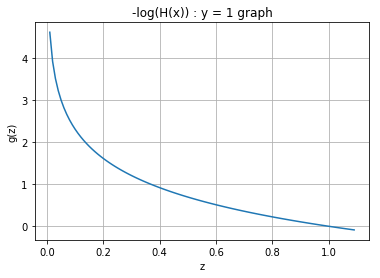

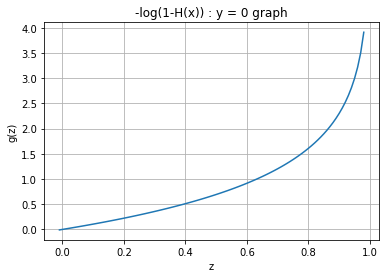

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

z = np.arange(0.01, 1.1, 0.01)
gz = -np.log(z)
plt.plot(z, gz)

plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('-log(H(x)) : y = 1 graph')
plt.grid(True)
plt.show()

z = np.arange(-0.01, 0.99, 0.01)
gz = -np.log(1-z)
plt.plot(z, gz)

plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('-log(1-H(x)) : y = 0 graph')
plt.grid(True)
plt.show()

### 2.3. Minimize cost (Gradient descent algorithm)
\begin{equation*}
Cost(W)=-\frac{1}{m}\sum ylog(H(x)) + (1-y)log(1-H(x))
\end{equation*}

\begin{equation*}
W := W - \alpha \frac{\partial}{\partial W}cost(W)
\end{equation*}

# 3. Lab1: Logistic regression classifier example

In [3]:
################################################################################
# lab5-1 : Logistic Regression Classifier
# 
################################################################################
import tensorflow as tf
tf.set_random_seed(777) # for reproducibility

# x_data = [study time, video watching gime]
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]

# y_data = [pass or fail]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]          


# Placeholder for a tensor that will be always fed
# shape=[instance number, feature number]
X = tf.placeholder(tf.float32, shape=[None, 2]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Model parameters
# W = [2 input, 1 output]
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
# b = [1 output]
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(x, W)))
logits = tf.matmul(X, W) + b
hypothesis = tf.sigmoid(logits)

# Cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * 
                      tf.log(1 - hypothesis))

# Cost minimize
train =  tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# launch the graph in a session
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 5000 == 0:
            print("Step:", step, "\tCost:", cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], 
            feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

Step: 0 	Cost: 1.0249461
Step: 5000 	Cost: 0.2360556
Step: 10000 	Cost: 0.14842772

Hypothesis:  [[0.03029247]
 [0.15823601]
 [0.30271617]
 [0.7823663 ]
 [0.9401934 ]
 [0.9803765 ]] 
Correct:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


- 학습이 종료되었을때 Cost가 0에 수렴했으므로 학습이 잘된것을 알수있다.
- 출력된 Hypothesis와 y값을 비교해보면 0~2 엘리먼트는 0.5보다 작고, 3~5엘리먼트는 0.5보다 큰것을 확인할 수 있다.
- 그래서 predicted 값이 cast된 결과가 y값과 일치하여 Accuracy가 1.0 (100%) 된것을 확인할수 있다.

# 4. Lab2: Classifying diabetes

In [9]:
################################################################################
# lab5-2 : Logistic Regression Classifier
#          example case of diabetes
################################################################################
import tensorflow as tf
import numpy as np

tf.set_random_seed(777) # for reproducibility

# load diabetes data
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

#print(x_data.shape, y_data.shape)


# Placeholder for a tensor that will be always fed
x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])

# Model parameters
W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(x, W)))
hypothesis = tf.sigmoid(tf.matmul(x, W) + b)

# cost/loss function
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * 
                      tf.log(1 - hypothesis))

# Minimize
train =  tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

# Launch the graph in a session
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Learning
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={x: x_data, y: y_data})
        if step % 5000 == 0:
            print("Step:", step, "\tCost:", cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], 
            feed_dict={x: x_data, y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

Step: 0 	Cost: 0.7773909
Step: 5000 	Cost: 0.5156897
Step: 10000 	Cost: 0.48776063

Hypothesis:  [[0.42196327]
 [0.918042  ]
 [0.1978522 ]
 [0.9495891 ]
 [0.28700778]
 [0.7368755 ]
 [0.9476778 ]
 [0.58999664]
 [0.2545923 ]
 [0.5319939 ]
 [0.7033797 ]
 [0.1714316 ]
 [0.2965409 ]
 [0.2494996 ]
 [0.7548226 ]
 [0.50640047]
 [0.7170253 ]
 [0.9133301 ]
 [0.8383159 ]
 [0.6153573 ]
 [0.69987655]
 [0.10513256]
 [0.5729652 ]
 [0.63842213]
 [0.3913424 ]
 [0.9182147 ]
 [0.45545694]
 [0.6440619 ]
 [0.7268967 ]
 [0.437819  ]
 [0.9381028 ]
 [0.83035225]
 [0.5255269 ]
 [0.83595026]
 [0.34520146]
 [0.64814156]
 [0.8476245 ]
 [0.6945556 ]
 [0.42814732]
 [0.40069643]
 [0.7526484 ]
 [0.14575939]
 [0.39655215]
 [0.0712635 ]
 [0.61889434]
 [0.92080224]
 [0.7006092 ]
 [0.71881443]
 [0.9079778 ]
 [0.9287025 ]
 [0.9207418 ]
 [0.22393307]
 [0.38650838]
 [0.9610092 ]
 [0.20761147]
 [0.60236067]
 [0.18068062]
 [0.7273664 ]
 [0.91061825]
 [0.50482625]
 [0.9567428 ]
 [0.7137405 ]
 [0.68591595]
 [0.814341  ]
 [0.554